In [12]:
import numpy as np
from matplotlib import pyplot as plt
import math

class ODE:
    def __init__ (self, y_prime, t_arr, y_o, methods_used, analitical=None, implicit=None, test=False):
        '''
        A classe contém soluções numericas para edo's dada uma edo y_prime e um intervalo de tempo t_arr
        
        Parameters
        ----------
        y_prime: function
            isolar y_prime na edo e definir uma função(t,y) para ser resolvida
        
        t_arr: list
            t_arr = [t_inicial, t_final, step]
        
        '''
        self.methods = methods_used
        self.y_prime = y_prime
        
        self.t_initial = t_arr[0]
        self.t_final = t_arr[1]
        self.t_step = t_arr[2]
        
        self.y_o = y_o
        
        self.y_bar = analitical
        self.implicit = implicit
        
        self.t = np.arange(self.t_initial, self.t_final, self.t_step)
        self.y = np.zeros(len(self.t))
        self.y[0] = self.y_o
        
        self.errors = []
        
        self.results = []

        self.test = test
        
    def reset(self):
        self.y = np.zeros(len(self.t))
        self.y[0] = self.y_o
        
        
    def euler_explicit(self):
        print('Solving Explicit Euler...')
        
        erro =np.zeros(len(self.t))
    
        for n in range(len(self.t) - 1):

            self.y[n + 1] = self.y[n] + (self.t_step * self.y_prime(self.t[n], self.y[n]))
            # calculo do erro de truncamento erro = |y - y_bar|
            erro[n] = np.abs(self.y[n] - self.y_bar(self.t)[n])
            
            if self.test:
                print(f'Tempo = {self.t[n+1]:.2f}, y = {self.y[n+1]:.5f}')
                print(f'Erro = {erro[n + 1]}')
            
        self.results.append(self.y)
        self.errors.append(erro)
        self.reset()
        print('Done!')
        
    def euler_implicit(self):
        print('Solving Implicit Euler...')
        
        erro =np.zeros(len(self.t))
    
        for n in range(len(self.t) - 1):

            self.y[n + 1] = self.implicit(self, n, self.t[n + 1], self.y[n + 1])
            # calculo do erro de truncamento erro = |y - y_bar|
            erro[n] = np.abs(self.y[n] - self.y_bar(self.t)[n])

            if self.test:
                print(f'Tempo = {self.t[n+1]:.2f}, y = {self.y[n+1]:.5f}')
                print(f'Erro = {erro[n + 1]}')
            
        self.results.append(self.y)
        self.errors.append(erro)
        self.reset()
        print('Done!')
    
    def runge_kutta_2(self):
        print('Solving Runge Kutta 2...')
        
        erro =np.zeros(len(self.t))
    
        for n in range(len(self.t) - 1):

            k1 = self.t_step * self.y_prime(self.t[n], self.y[n])
            k2 = self.t_step * self.y_prime(self.t[n + 1], (self.y[n] + k1))
            self.y[n + 1] = self.y[n] + 0.5 * (k1 + k2)
            # calculo do erro de truncamento erro = |y - y_bar|
            erro[n] = np.abs(self.y[n] - self.y_bar(self.t)[n])

            if self.test:
                print(f'Tempo = {self.t[n+1]:.2f}, y = {self.y[n+1]:.5f}')
                print(f'Erro = {erro[n + 1]}')
            
        self.results.append(self.y)
        self.errors.append(erro)
        self.reset()
        print('Done!')
        
    def runge_kutta_4(self):
        print('Solving Runge Kutta 4...')
        
        erro =np.zeros(len(self.t))
    
        for n in range(len(self.t) - 1):

            k1 = self.t_step * self.y_prime(self.t[n], self.y[n])
            k2 = self.t_step * self.y_prime((self.t[n] + (0.5 * self.t_step)), (self.y[n] + (0.5 * k1)))
            k3 = self.t_step * self.y_prime((self.t[n] + (0.5 * self.t_step)), (self.y[n] + (0.5 * k2)))
            k4 = self.t_step * self.y_prime(self.t[n + 1], (self.y[n] + k3))
            self.y[n + 1] = self.y[n] + (1 / 6) * (k1 + (2 * k2) + (2 * k3) + k4)
            # calculo do erro de truncamento erro = |y - y_bar|
            erro[n] = np.abs(self.y[n] - self.y_bar(self.t)[n])

            if self.test:
                print(f'Tempo = {self.t[n+1]:.2f}, y = {self.y[n+1]:.5f}')
                print(f'Erro = {erro[n + 1]}')
            
        self.results.append(self.y)
        self.errors.append(erro)
        self.reset()
        print('Done!')
        
    def analitical(self):
        y_values = np.zeros(len(self.t))
        
        for i in range(len(self.t)):
            y_values[i] = (self.y_bar(self.t[i]))
            
        self.results.append(self.y)
        self.reset()
        
    def compare_plot(self):
        fig =  plt.figure()
        
        plt.title('Comparação de soluções numéricas da EDO dada')
        plt.xlabel('t')
        plt.ylabel('y(t)')
        
        for i in range(len(self.methods)):
            plt.plot(self.t, self.results[i])
        
        plt.legend(self.methods)
        plt.show()
        
    def compare_erro(self):
        fig =  plt.figure()
        
        plt.title('Comparação de soluções numéricas da EDO dada')
        plt.xlabel('t')
        plt.ylabel('y(t)')
        
        for i in range(len(self.methods)):
            plt.plot(self.t, self.errors[i])
        
        plt.legend(self.methods)
        plt.show()
        
        
    def solve(self):
        
        if self.y_bar != None:
            self.analitical()
        
        for method in self.methods:
            if method.lower() == 'euler explícito':
                self.euler_explicit()
                
            elif method.lower() == 'euler implicito':
                pass
                # self.euler_implicit()
                
            elif method.lower() == 'runge kutta 2ª ordem':
                self.runge_kutta_2()
                
            elif method.lower() == 'runge kutta 4ª ordem':
                self.runge_kutta_4()
                
            elif method.lower() == 'solução analítica':
                self.analitical()
            else:
                print(method)
                print("Método inválido, por favor digite um dos seguintes:\n\
                    ['Euler explícito', 'Euler implicito', 'Runge Kutta 2ª ordem', 'Runge Kutta 4ª ordem', 'Solução Analítica']")
                
        pass      
    

Solving Explicit Euler...
Done!
Solving Runge Kutta 2...
Done!
Solving Runge Kutta 4...
Done!


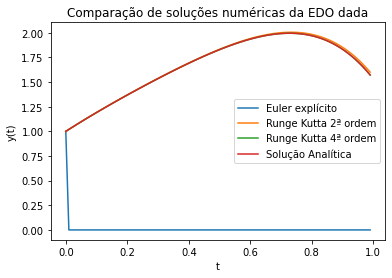

In [13]:
methods_used = ['Euler explícito', 'Runge Kutta 2ª ordem', 'Runge Kutta 4ª ordem', 'Solução Analítica']

'''Definindo condições de contorno'''
t_o = 0.
t_final = 1.
y_o = 1.
dt =0.01

'''Definindo as arrays de tempo, y'''
t = np.arange(t_o, t_final + dt, dt)
y = np.zeros(len(t))
y[0] = y_o

'''Definindo função analizada'''
y_prime = lambda t, y: 2 - (2 * t) + (4 * (t ** 2)) - (4 * (t ** 3)) - (4 * (t ** 4))
'''Definindo função exata'''
y_bar = lambda t: 1 + (2 * t) - (t ** 2) + ((4 / 3) * (t ** 3)) - (t ** 4) - ((4 / 5) * (t ** 5))
'''Definindo a função do método implícito'''
def y_imp(self, n, t, y) : return (self.y[n] + ((self.t_step) * self.y_prime(self.t[n + 1])))

'''Criando o ambiente para resolver a EDO'''
edo_1 = ODE(y_prime, [t_o, t_final, dt], y_o, methods_used, analitical= y_bar, implicit= y_imp)

edo_1.solve()
edo_1.compare_plot()

